This code is used to optimise how we assign overtime to ground operations crew. The two input files are:

1) A file containing the required and supplied heads at a sub department and grade level,
   split at short intervals throughout the day.

2) A file containing the allowed shift patterns at a sub department and grade level,
   numbered, and with start and end times.
   
Additionally a parameter dictionary needs to be defined as shown below, as well as filepaths and 
filenames for the input and output files. The output file is in the same format as the shift patterns
input file, repeated for each date being processed, and with the number of starters per shift appended.

In [1]:
# import functions file

import crew_overtime_opt_functions as coo

In [2]:
# define paramater dictionaries

parameters = {   # the sub department and the grade of the data being processed
                 'sub_dept' : 'Aircraft Movements'
               , 'grade' : 'LV2'
    
                 # the granularity of time steps per hour, for example,
                 # if the time steps are at 5 minute intervals per hour,
                 # then granularity_time_steps = 60 minutes/5 minutes = 12 
               , 'granularity_time_steps' : 12   
    
                # total hours in the work day
               , 'total_hours' : 20
    
                 # day start time
               , 'day_start_tm' : '04:00'
    
                # day start time
               , 'day_end_tm' : '00:00'
    
                 # minimum number of people starting at any shift start
                 # may potentially be greater than one to mitigate against 
                 # shift start sessions being done for a single employee
               , 'min_starters_on_shifts' : 1
    
                 # ratio of cost we will accept to cover shifts eg 0.5 means that we
                 # will add an extra employee if they can cover over half of a shift
               , 'emp_cost_hour' :  0.9
    
                 # constants relating to the 'cost' of being over or under resourced
                 # these reflect the trade off between being under and over resourced
                 # as we generally care about covering times of resource deficit more
                 # than times of resource surplus, the under resource constant will 
                 # likely have a higher weight
               , 'under_resource_const' : 6
               , 'over_resource_const' : 1
    
                # filepath of the solver - needed to find the executable
               , 'solver_filepath' : 'C:\\Users\\u164412\\cbc\\cbc'
                }

parameters['total_periods'] = parameters['total_hours'] * parameters['granularity_time_steps']


In [3]:
# set the import and export filepaths and filenames 

import_path = 'C:\\Users\\u164412\\Documents\\Crew Optimisation\\'
import_data_filename = 'shift reqs ac movements sept 18.xlsx'
import_shift_filename = 'shift_times_agg 2.xlsx'
export_path = 'C:\\Users\\u164412\\Documents\\Crew Optimisation\\'
export_filename = 'opt shift times ac movements sept 18.xlsx'

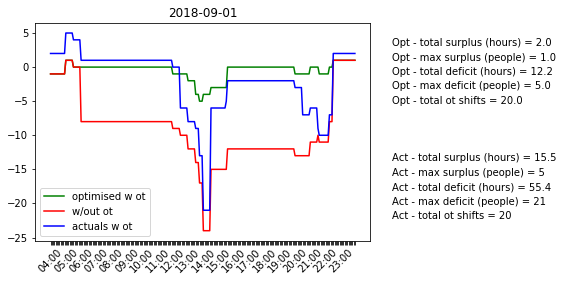

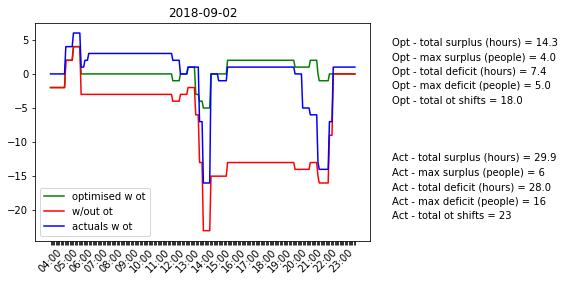

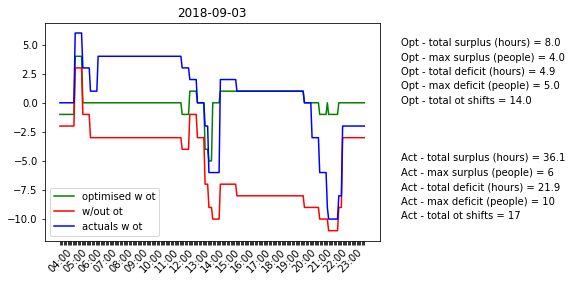

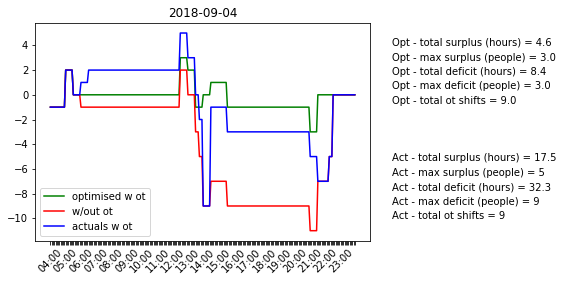

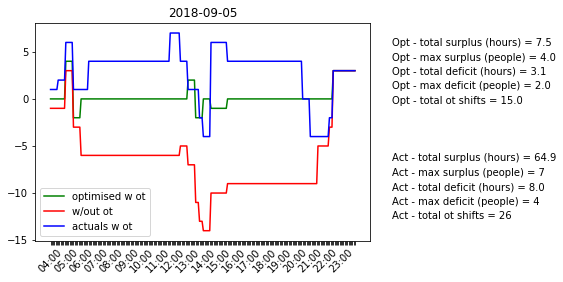

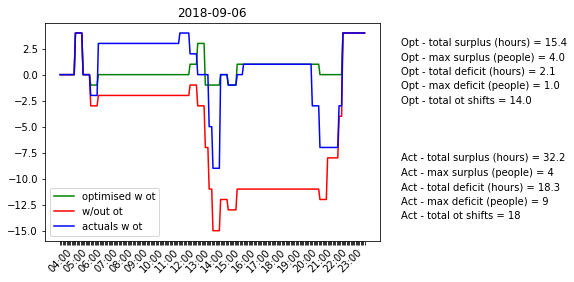

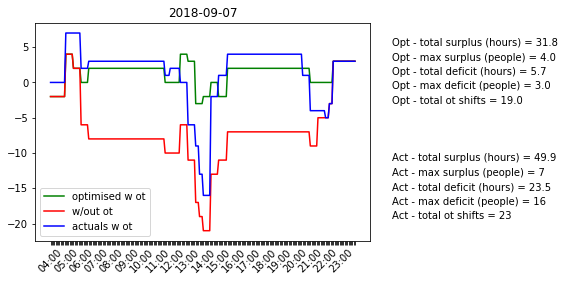

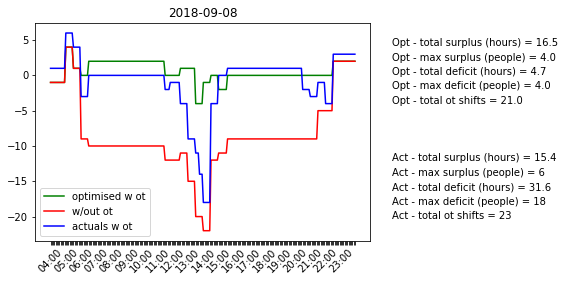

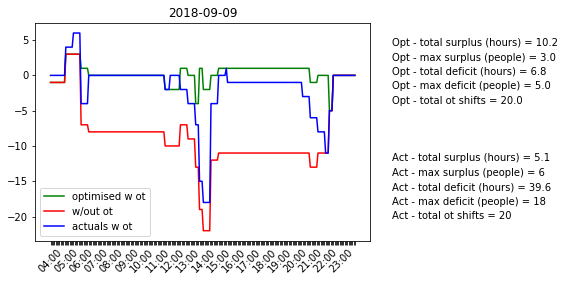

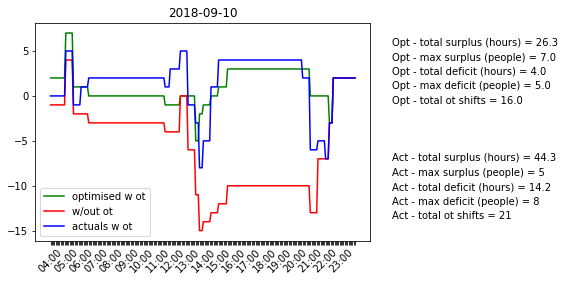

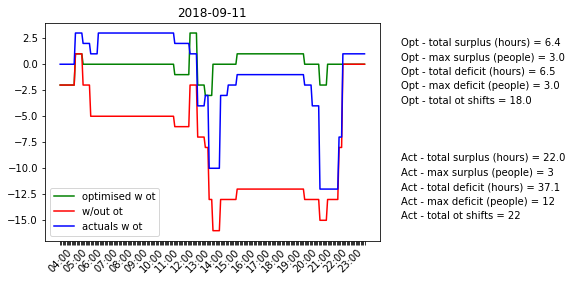

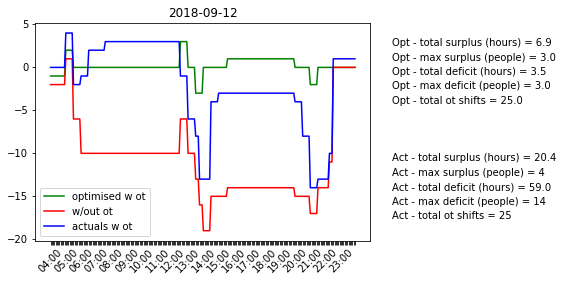

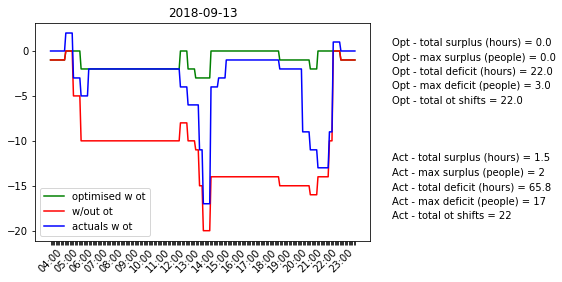

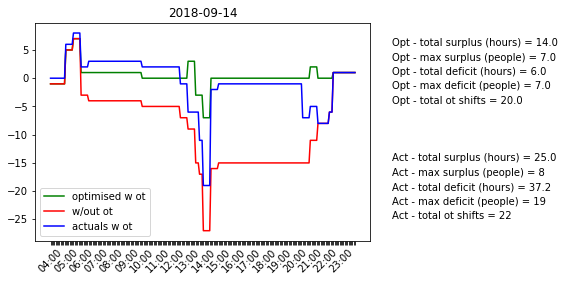

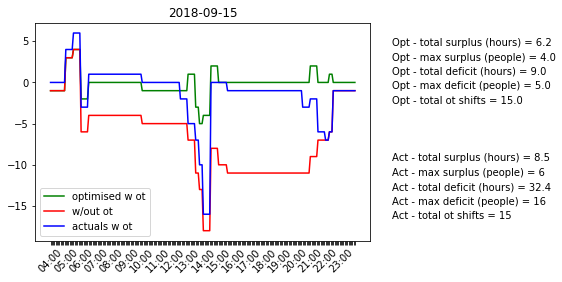

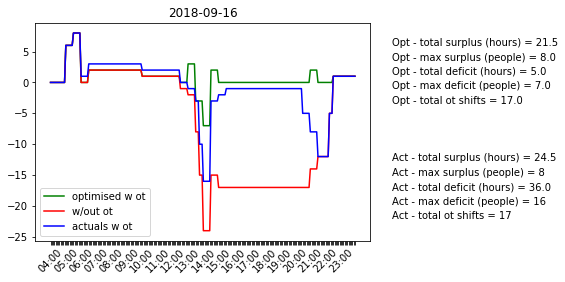

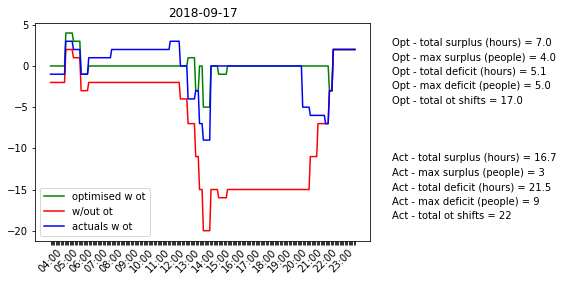

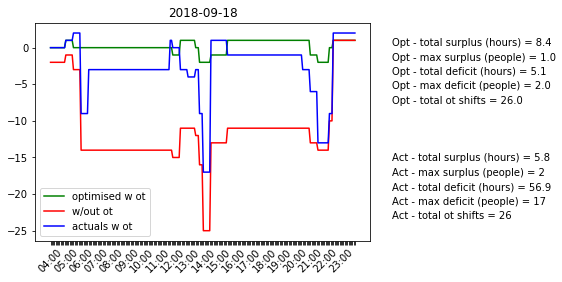

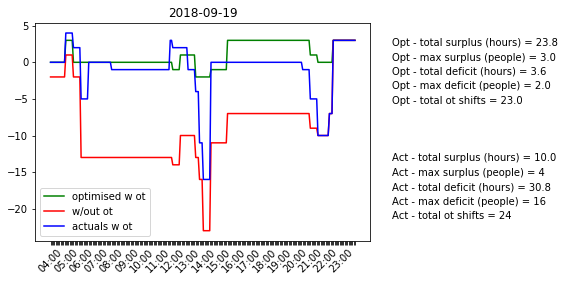

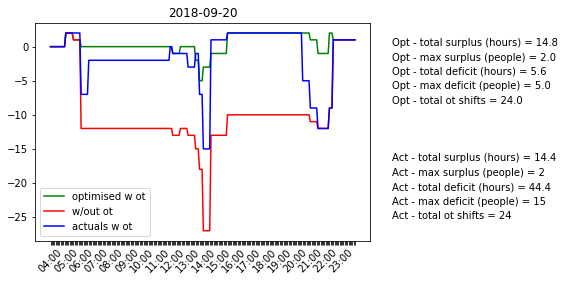

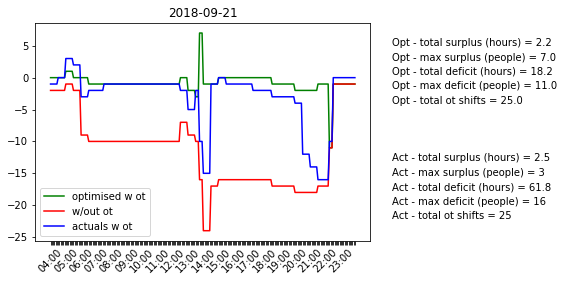

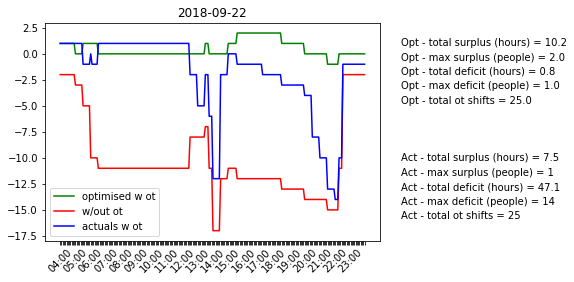

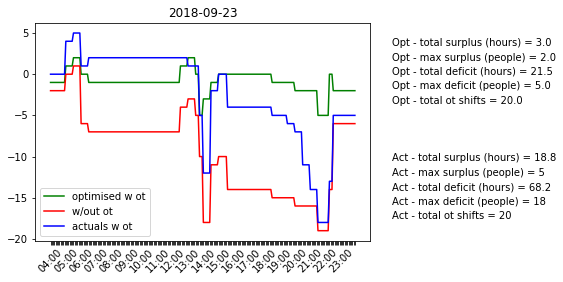

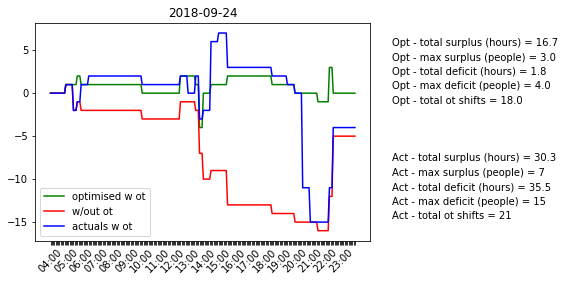

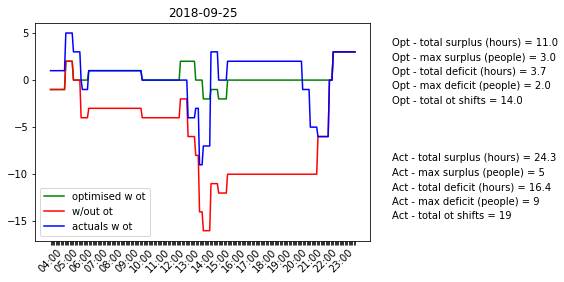

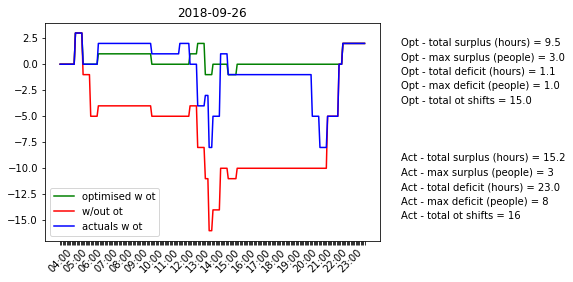

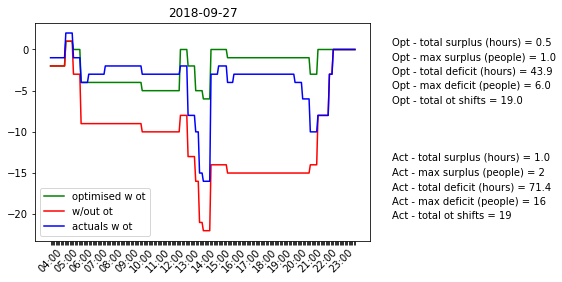

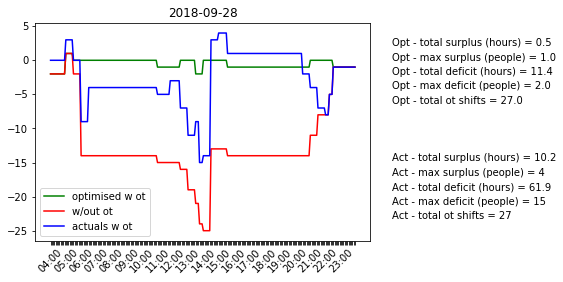

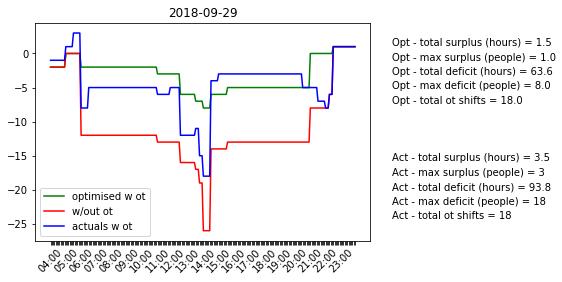

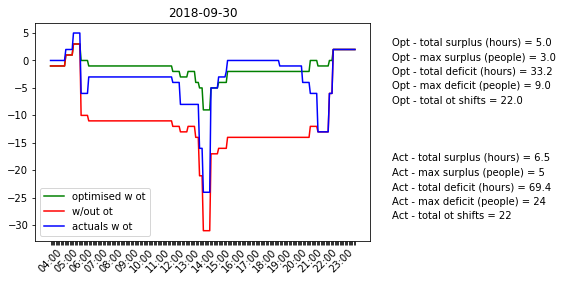

<Figure size 432x288 with 0 Axes>

In [4]:
# process the data
# can assign the output objects if needed, otherwise just take output file from specified folder

_, _, _  = coo.full_process_data(parameters, import_path, import_data_filename, import_shift_filename
                               , export_path, export_filename, show_graphs = True)